#
**Stock MArket PRediction - USing dual moving averages**

description : this program uses dual moving averages crrosover to determine when to buy and sell stocks.


In [ ]:
#import dependencies

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [4]:
#store the data
AAPL =pd.read_csv('AAPL.csv')
#show the data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


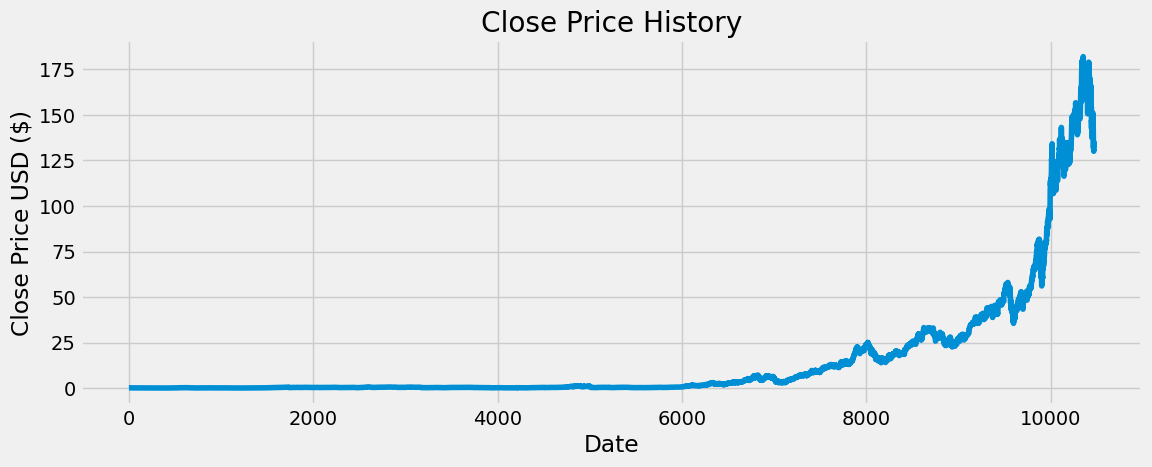

In [6]:
#visualize the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(AAPL['Close'], label ='AAPL')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [8]:
#create the simpple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Close'] = AAPL['Close'].rolling(window=30).mean()
SMA30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
10463,147.226668
10464,146.386668
10465,145.585001
10466,144.386334


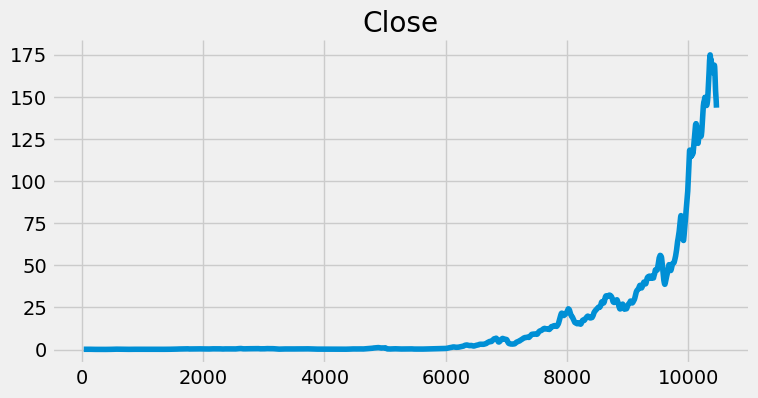

In [11]:
# @title Close

from matplotlib import pyplot as plt
SMA30['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
# prompt: create a simple moving average of 100 day

# Create the simple moving average with a 100-day window
SMA100 = pd.DataFrame()
SMA100['Close'] = AAPL['Close'].rolling(window=100).mean()
SMA100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
10463,160.944701
10464,160.627201
10465,160.357401
10466,160.041801


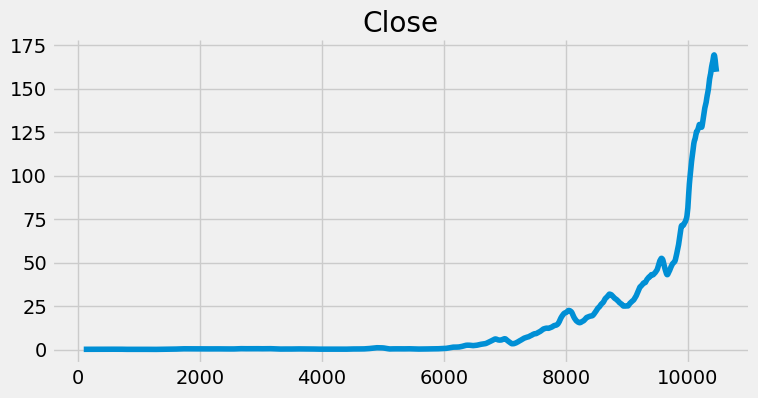

In [22]:
# @title Close

from matplotlib import pyplot as plt
SMA100['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

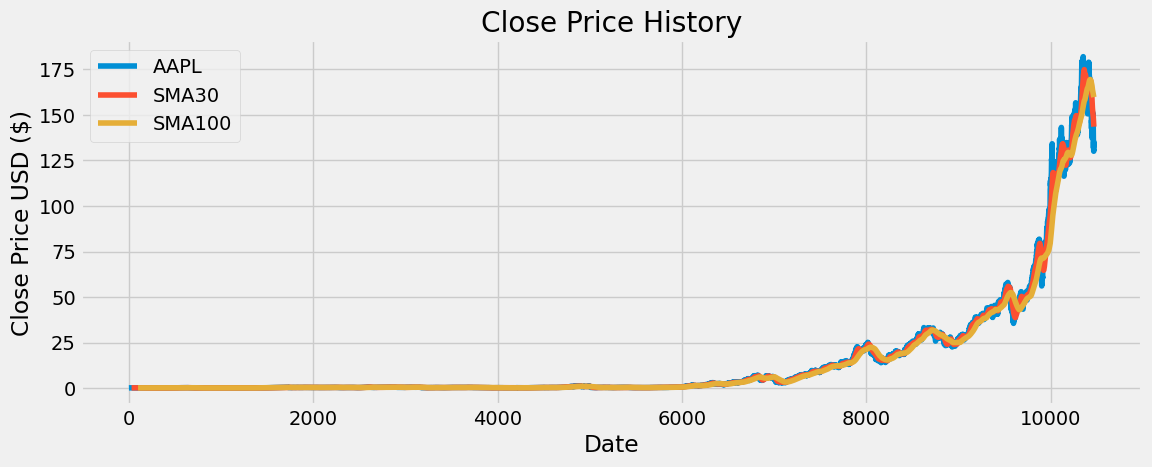

In [23]:
#visualize the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(AAPL['Close'], label ='AAPL')
plt.plot(SMA30['Close'], label ='SMA30')
plt.plot(SMA100['Close'], label ='SMA100')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [24]:
#create a new dataframe to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Close']
data['SMA30'] = SMA30['Close']
data['SMA100'] = SMA100['Close']
data


,AAPL,SMA30,SMA100
0,0.128348,NaN,NaN
1,0.121652,NaN,NaN
2,0.112723,NaN,NaN
3,0.115513,NaN,NaN
4,0.118862,NaN,NaN
...,...,...,...
10463,131.880005,147.226668,160.944701
10464,132.759995,146.386668,160.627201
10465,135.429993,145.585001,160.357401
10466,130.059998,144.386334,160.041801


In [25]:

#craete a function to signal when to buy and sell of the stocks
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag !=1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
        if flag !=0:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(data['AAPL'][i])
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [26]:
#store the buy and sell data into a variable
buy_sell_data = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell_data[0]
data['Sell_Signal_Price'] = buy_sell_data[1]
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,0.128348,NaN,NaN,NaN,NaN
1,0.121652,NaN,NaN,NaN,NaN
2,0.112723,NaN,NaN,NaN,NaN
3,0.115513,NaN,NaN,NaN,NaN
4,0.118862,NaN,NaN,NaN,NaN
...,...,...,...,...,...
10463,131.880005,147.226668,160.944701,NaN,NaN
10464,132.759995,146.386668,160.627201,NaN,NaN
10465,135.429993,145.585001,160.357401,NaN,NaN
10466,130.059998,144.386334,160.041801,NaN,NaN


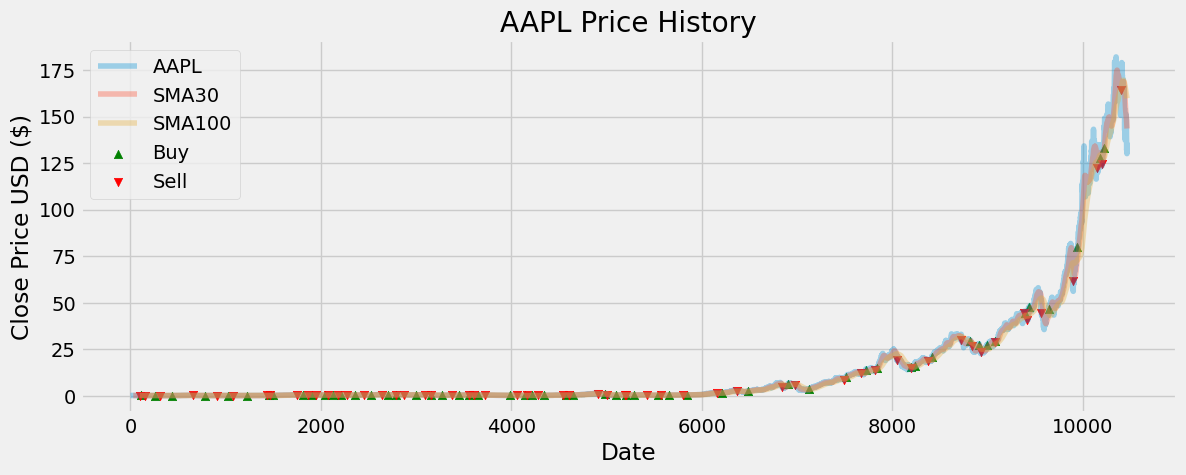

In [27]:
#visualize the data and the stragey to buy and sell stocks
plt.figure(figsize=(12.6, 4.6)) # Changed this line to pass figsize as a tuple
plt.plot(data['AAPL'],label='AAPL', alpha=0.35)
plt.plot(data['SMA30'],label='SMA30',alpha=0.35)
plt.plot(data['SMA100'],label='SMA100',alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color='red')
plt.title('AAPL Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()